<a href="https://colab.research.google.com/github/Mohamed-salah-906/AMIT_Assignment1/blob/Knn/ML_Ass1_GP12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This assignment aims to explore the performance of Support Vector Machines
(SVM) and Perceptron that is a single neuron consists of adder and one
threshold function on a given dataset (provided in bright space in txt format).

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from scipy import stats

# SVM Classifier

# (a) Default SVM

*   **Train** the model using the dataset and obtain **confusion matrices** for **training** and **test** datasets.**(Done)**
*    **Visualize** decision surfaces for **multi-calss classification**, using b**lue, red, and orange colors** to plot each class.**(Done)**
*     **Training** data points should be marked **different** than **test** data points for **visualization** of decision surfaces.**(Done)**
*     Keep **same colors** and same **markers** for each class for **all results**.**(Done)**


In [ ]:
# Dataset
X_Train = np.array([[1.3, 3.3], [1.4, 2.5], [1.8, 2.8], [1.9, 3.1], [1.5, 1.5], [1.8, 2], [2.3, 1.9], [2.4, 1.4], [2.4, 2.4], [2.4, 3], [2.7, 2.7], [2.3, 3.2]])
Y_Train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])
X_Test = np.array([[1.7, 2.5], [1.9, 2.7], [2, 2.15], [2.4, 2], [2.2, 3.25], [2.4, 2.25]])
Y_Test = np.array([0, 0, 1, 1, 2, 2])

Train the model using the dataset.

In [ ]:
# Train the SVM classifier
classifier = svm.SVC()
classifier.fit(X_Train, Y_Train)

Obtain confusion matrices for training and test datasets.

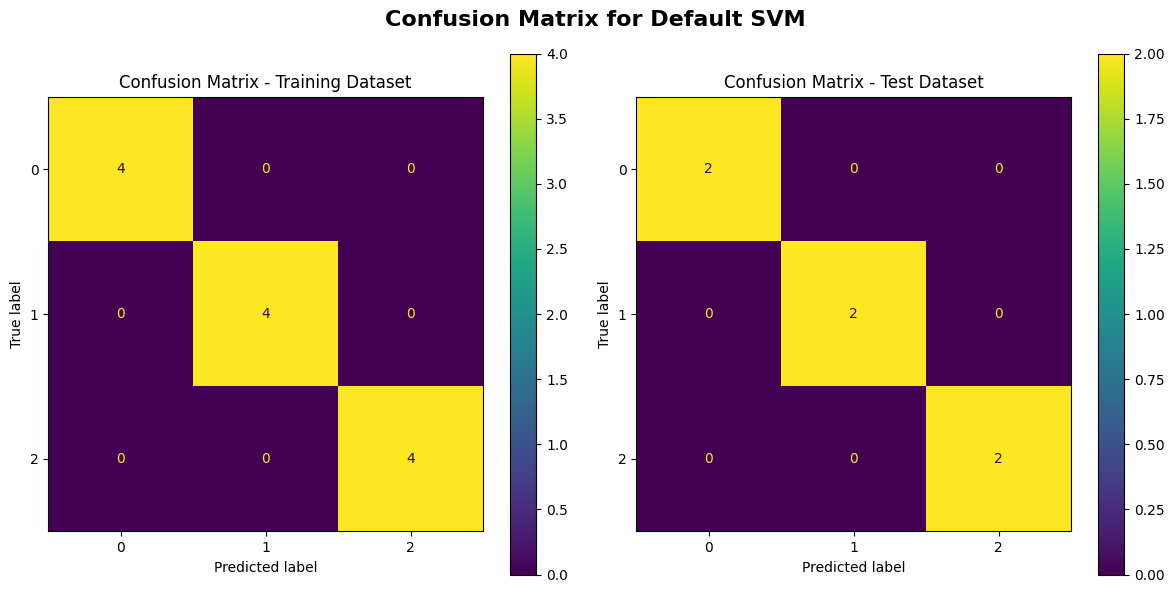

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for the test dataset
test_cm = ConfusionMatrixDisplay.from_estimator(classifier, X_Test, Y_Test, ax=axs[1])
test_cm.ax_.set_title('Confusion Matrix - Test Dataset')

# Plot the confusion matrix for the training dataset
train_cm = ConfusionMatrixDisplay.from_estimator(classifier, X_Train, Y_Train, ax=axs[0])
train_cm.ax_.set_title('Confusion Matrix - Training Dataset')

# Add a suptitle for the entire plot
plt.suptitle('Confusion Matrix for Default SVM', fontsize=16, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Using blue, red, and orange colors to plot each class.

In [ ]:
#Get all data in order not to miss any point
X_combined = np.concatenate((X_Train, X_Test))
Y_combined = np.concatenate((Y_Train, Y_Test))

# Create a meshgrid for plotting decision regions
h = 0.02  # Step size in the mesh
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#this will be used in all future plots xx,yy.

# Create a colormap with custom colors
# Define custom colors
colors = ['blue', 'red', 'orange']
cmap = ListedColormap(colors)

Visualize decision surfaces for multi-calss classification (Default SVM).

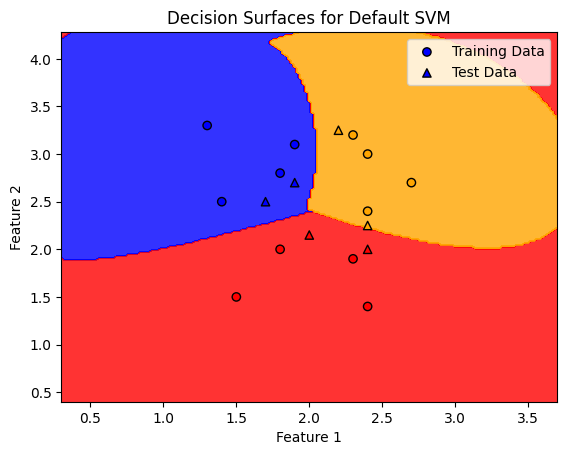

In [ ]:
# Make predictions for each point in the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision surfaces
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

# Plot training data points make edges black and in circle shape
plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=cmap, edgecolors='k', marker='o', label='Training Data')

# Plot test data points make edges black and in tringle shape
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=cmap, edgecolors='k', marker='^', label='Test Data')

# Add legends and labels
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Surfaces for Default SVM')

# Show the plot
plt.show()

# (b) One-vs-Rest SVM and Perceptron


*    Extend the **analysis** using the **one-vs-rest** strategy for **SVM** and **Perceptron** algorithms.
      *    Training
and test data should be **labeled** for **one vs rest** as **binary classifier**. For example, class 0 vs rest means class 0 will be labeled as 1 and
the rest (classes 1 and 2) will be labeled as 0.**---> (test points color)** 
*     Obtain **confusion matrices** for both **training** and **test** datasets. **(Done)**
*      **Compare** and **analyze**
SVM and Perceptron **results**. **(Done)**
*     **Visualize** decision surfaces using the **color scheme mentioned earlier.(Done)**



Training and test data should be labeled for one vs rest as binary classifier. For example, class 0 vs rest means class 0 will be labeled as 1 and the rest (classes 1 and 2) will be labeled as 0.

In [ ]:
# Label data for one-vs-rest as binary classifier
Y_Train_ovr1 = np.where(Y_Train == 0, 1, 0)
Y_Test_ovr1  = np.where(Y_Test ==  0, 1, 0)

Y_Train_ovr2 = np.where(Y_Train == 1, 1, 0)
Y_Test_ovr2  = np.where(Y_Test ==  1, 1, 0)

Y_Train_ovr3 = np.where(Y_Train == 2, 1, 0)
Y_Test_ovr3  = np.where(Y_Test ==  2, 1, 0)

Extend the analysis using the one-vs-rest strategy for SVM and Perceptron algorithms.

In [ ]:
# Train the SVM classifier with one-vs-rest strategy

svm_classifier1 = svm.SVC(kernel='linear')
# svm_classifier1 = svm.SVC()
svm_classifier1.fit(X_Train, Y_Train_ovr1)

svm_classifier2 = svm.SVC(kernel='linear')
# svm_classifier2 = svm.SVC()
svm_classifier2.fit(X_Train, Y_Train_ovr2)

svm_classifier3 = svm.SVC(kernel='linear')
# svm_classifier3 = svm.SVC()
svm_classifier3.fit(X_Train, Y_Train_ovr3)

# Train the Perceptron classifier with one-vs-rest strategy
perceptron_classifier1 = Perceptron()
perceptron_classifier1.fit(X_Train, Y_Train_ovr1)

perceptron_classifier2 = Perceptron()
perceptron_classifier2.fit(X_Train, Y_Train_ovr2)

perceptron_classifier3 = Perceptron()
perceptron_classifier3.fit(X_Train, Y_Train_ovr3)

Perceptron()


Obtain confusion matrices for both training and test datasets.

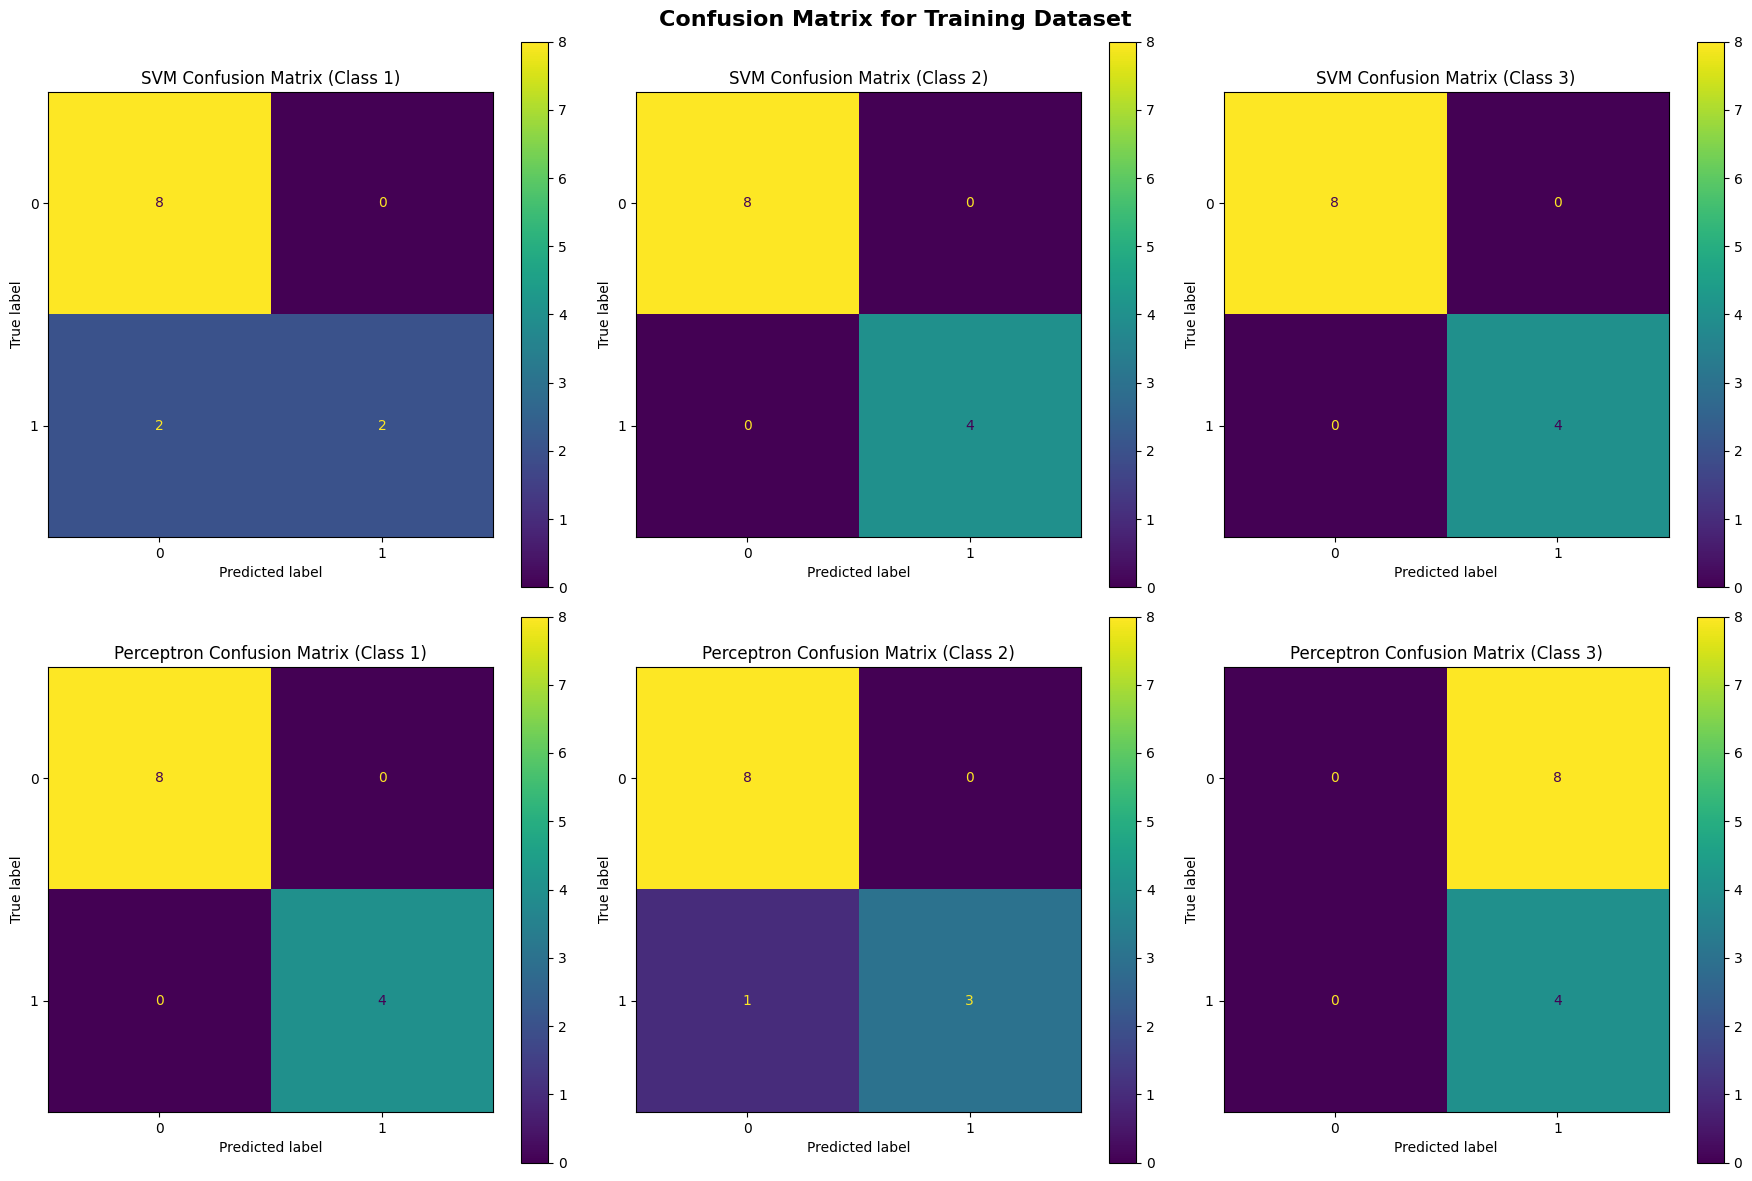

In [ ]:
# Create a figure with three rows and two columns for the subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot the confusion matrix for SVM classifier
svm_cm = ConfusionMatrixDisplay.from_estimator(svm_classifier1, X_Train, Y_Train_ovr1, ax=axs[0, 0])
svm_cm.ax_.set_title('SVM Confusion Matrix (Class 1)')

# Plot the confusion matrix for Perceptron classifier
perceptron_cm = ConfusionMatrixDisplay.from_estimator(perceptron_classifier1, X_Train, Y_Train_ovr1, ax=axs[1, 0])
perceptron_cm.ax_.set_title('Perceptron Confusion Matrix (Class 1)')

# Plot the confusion matrix for SVM classifier (second row)
svm_cm2 = ConfusionMatrixDisplay.from_estimator(svm_classifier2, X_Train, Y_Train_ovr2, ax=axs[0, 1])
svm_cm2.ax_.set_title('SVM Confusion Matrix (Class 2)')

# Plot the confusion matrix for Perceptron classifier (second row)
perceptron_cm2 = ConfusionMatrixDisplay.from_estimator(perceptron_classifier2, X_Train, Y_Train_ovr2, ax=axs[1, 1])
perceptron_cm2.ax_.set_title('Perceptron Confusion Matrix (Class 2)')

# Plot the confusion matrix for SVM classifier (third row)
svm_cm3 = ConfusionMatrixDisplay.from_estimator(svm_classifier3, X_Train, Y_Train_ovr3, ax=axs[0, 2])
svm_cm3.ax_.set_title('SVM Confusion Matrix (Class 3)')

# Plot the confusion matrix for Perceptron classifier (third row)
perceptron_cm3 = ConfusionMatrixDisplay.from_estimator(perceptron_classifier3, X_Train, Y_Train_ovr3, ax=axs[1, 2])
perceptron_cm3.ax_.set_title('Perceptron Confusion Matrix (Class 3)')

# Add a suptitle for the entire plot
plt.suptitle('Confusion Matrix for Training Dataset', fontsize=16, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Test

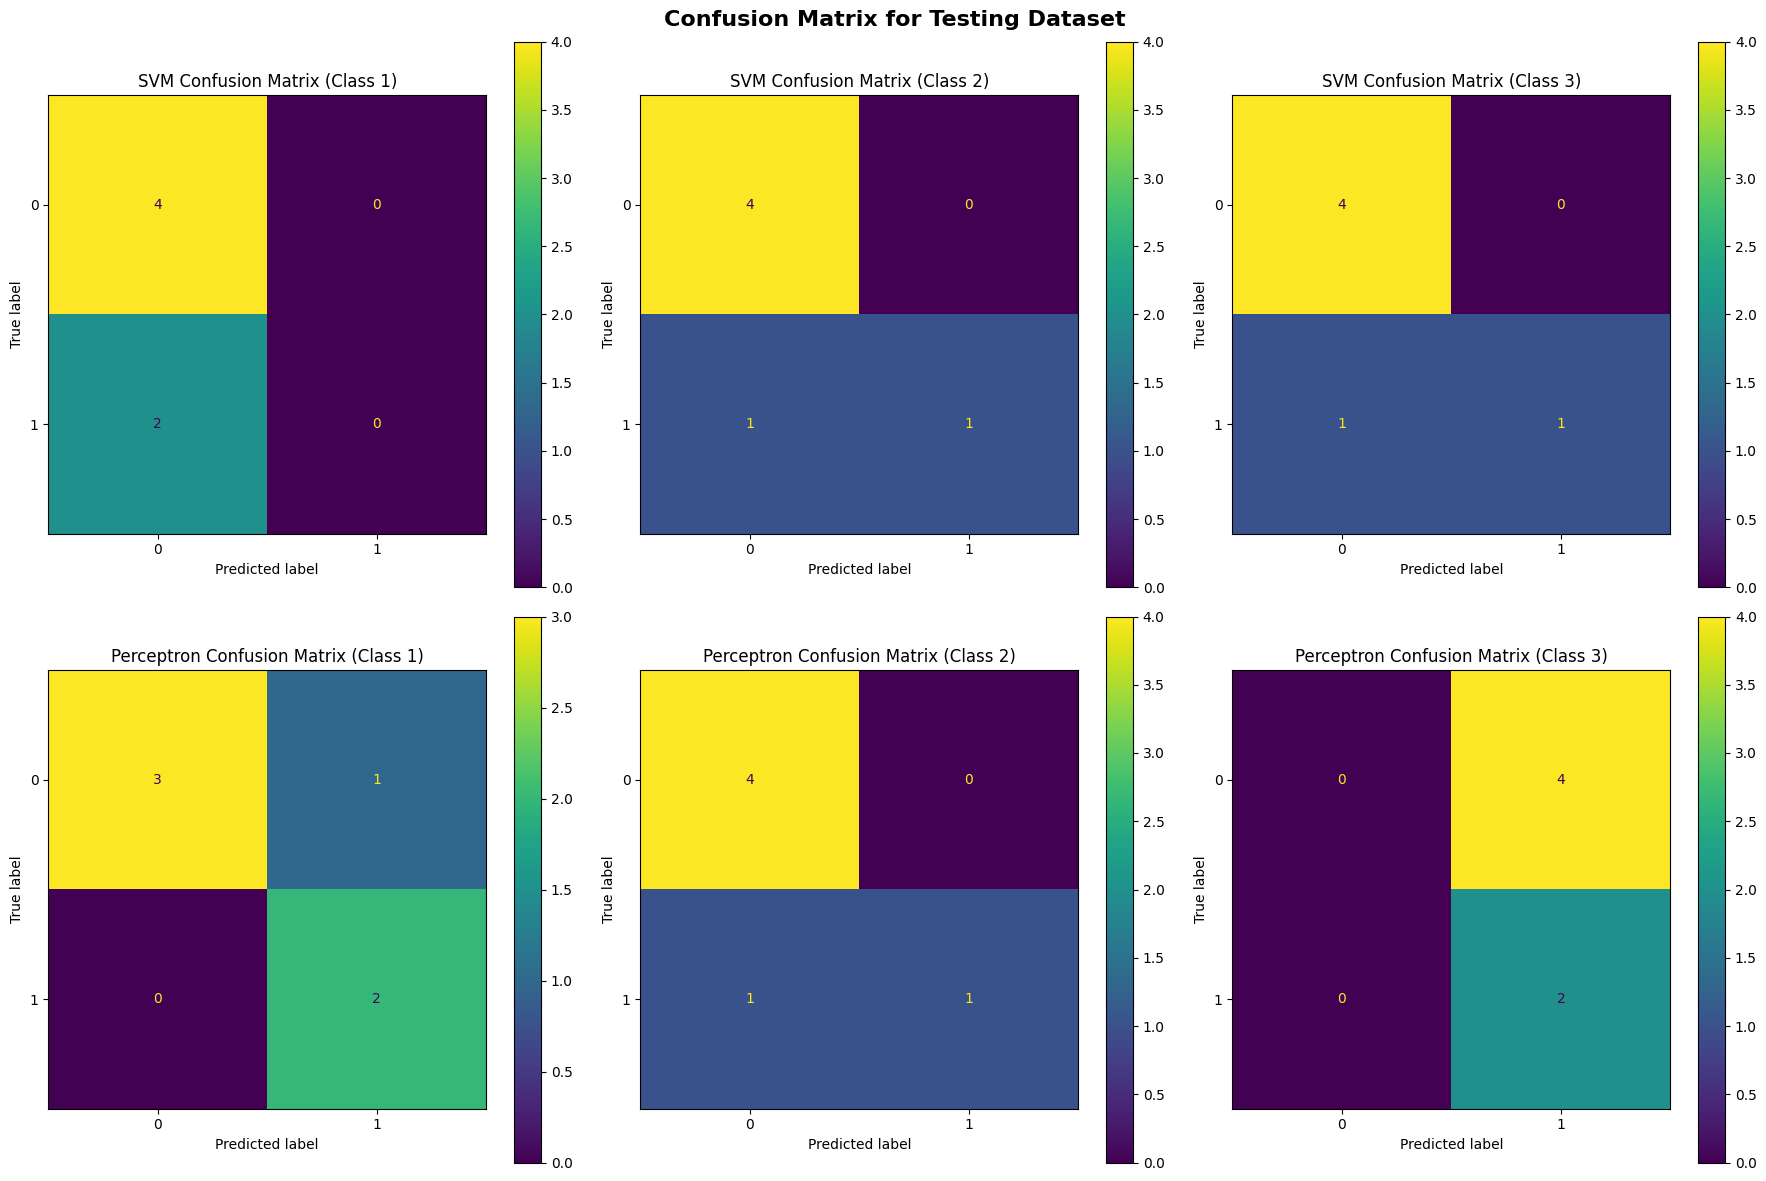

In [ ]:
# Create a figure with three rows and two columns for the subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot the confusion matrix for SVM classifier
svm_cm = ConfusionMatrixDisplay.from_estimator(svm_classifier1, X_Test, Y_Test_ovr1, ax=axs[0, 0])
svm_cm.ax_.set_title('SVM Confusion Matrix (Class 1)')

# Plot the confusion matrix for Perceptron classifier
perceptron_cm = ConfusionMatrixDisplay.from_estimator(perceptron_classifier1, X_Test, Y_Test_ovr1, ax=axs[1, 0])
perceptron_cm.ax_.set_title('Perceptron Confusion Matrix (Class 1)')

# Plot the confusion matrix for SVM classifier (second row)
svm_cm2 = ConfusionMatrixDisplay.from_estimator(svm_classifier2, X_Test, Y_Test_ovr2, ax=axs[0, 1])
svm_cm2.ax_.set_title('SVM Confusion Matrix (Class 2)')

# Plot the confusion matrix for Perceptron classifier (second row)
perceptron_cm2 = ConfusionMatrixDisplay.from_estimator(perceptron_classifier2, X_Test, Y_Test_ovr2, ax=axs[1, 1])
perceptron_cm2.ax_.set_title('Perceptron Confusion Matrix (Class 2)')

# Plot the confusion matrix for SVM classifier (third row)
svm_cm3 = ConfusionMatrixDisplay.from_estimator(svm_classifier3, X_Test, Y_Test_ovr3, ax=axs[0, 2])
svm_cm3.ax_.set_title('SVM Confusion Matrix (Class 3)')

# Plot the confusion matrix for Perceptron classifier (third row)
perceptron_cm3 = ConfusionMatrixDisplay.from_estimator(perceptron_classifier3, X_Test, Y_Test_ovr3, ax=axs[1, 2])
perceptron_cm3.ax_.set_title('Perceptron Confusion Matrix (Class 3)')

# Add a suptitle for the entire plot
plt.suptitle('Confusion Matrix for Testing Dataset', fontsize=16, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Make prediction to be used in Visualization.

In [ ]:
# Make predictions for each model
svm_predictions1 = svm_classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
svm_predictions1 = svm_predictions1.reshape(xx.shape)

svm_predictions2 = svm_classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
svm_predictions2 = svm_predictions2.reshape(xx.shape)

svm_predictions3 = svm_classifier3.predict(np.c_[xx.ravel(), yy.ravel()])
svm_predictions3 = svm_predictions3.reshape(xx.shape)

perceptron_predictions1 = perceptron_classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
perceptron_predictions1 = perceptron_predictions1.reshape(xx.shape)

perceptron_predictions2 = perceptron_classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
perceptron_predictions2 = perceptron_predictions2.reshape(xx.shape)

perceptron_predictions3 = perceptron_classifier3.predict(np.c_[xx.ravel(), yy.ravel()])
perceptron_predictions3 = perceptron_predictions3.reshape(xx.shape)

Visualize decision surfaces using the color scheme mentioned earlier.

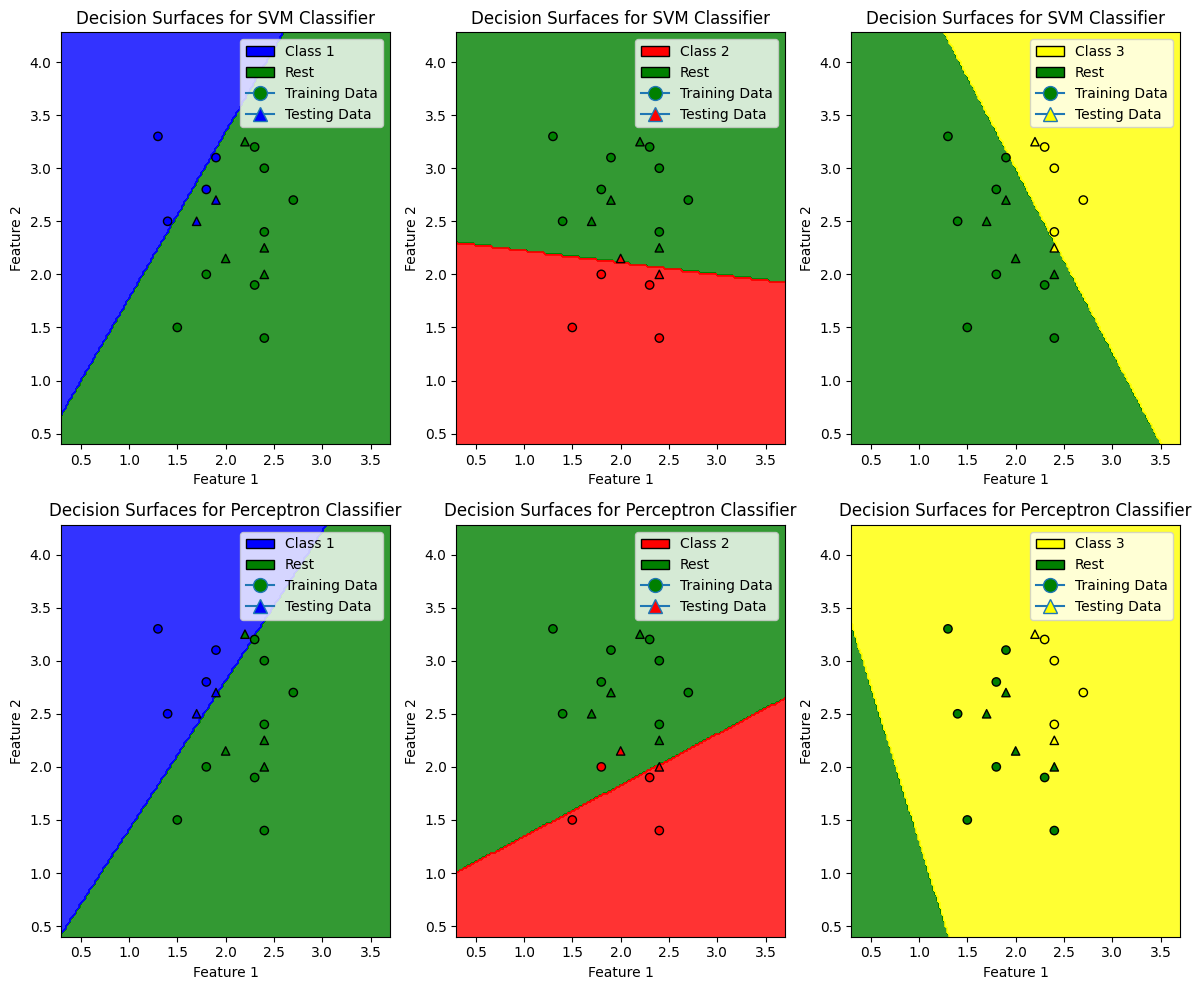

In [ ]:
# Create a custom colormap for visualization
cmap11 = ListedColormap(['green', 'blue'])
cmap21 = ListedColormap(['green', 'red']) 
cmap31 = ListedColormap(['green', 'yellow'])

# Create figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

# Visualize decision surfaces for SVM classifier
axes[0,0].contourf(xx, yy, svm_predictions1, alpha=0.8, cmap=cmap11)
axes[0,0].scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train_ovr1, cmap=cmap11, edgecolors='k', marker='o', label='Training Data')
axes[0,0].scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test_ovr1, cmap=cmap11, edgecolors='k', marker='^', label='Test Data')
axes[0,0].set_xlabel('Feature 1')
axes[0,0].set_ylabel('Feature 2')
axes[0,0].set_title('Decision Surfaces for SVM Classifier')

# Create custom legend entries for SVM subplot
legend_elements = [
    mpatches.Patch(facecolor='blue', edgecolor='k', label='Class 1'),
    mpatches.Patch(facecolor='green', edgecolor='k', label='Rest'),
    plt.Line2D([0], [0], marker='o', label='Training Data', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='^', label='Testing Data', markerfacecolor='blue', markersize=10)
]
axes[0,0].legend(handles=legend_elements)

# Visualize decision surfaces for Perceptron classifier
axes[1,0].contourf(xx, yy, perceptron_predictions1, alpha=0.8, cmap=cmap11)
axes[1,0].scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train_ovr1, cmap=cmap11, edgecolors='k', marker='o', label='Training Data')
axes[1,0].scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test_ovr1, cmap=cmap11, edgecolors='k', marker='^', label='Test Data')
axes[1,0].set_xlabel('Feature 1')
axes[1,0].set_ylabel('Feature 2')
axes[1,0].set_title('Decision Surfaces for Perceptron Classifier')
# Creat custom legend entries for Perceptron subplot
axes[1,0].legend(handles=legend_elements)

# Visualize decision surfaces for SVM classifier
axes[0,1].contourf(xx, yy, svm_predictions2, alpha=0.8, cmap=cmap21)
axes[0,1].scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train_ovr2, cmap=cmap21, edgecolors='k', marker='o', label='Training Data')
axes[0,1].scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test_ovr2, cmap=cmap21, edgecolors='k', marker='^', label='Test Data')
axes[0,1].set_xlabel('Feature 1')
axes[0,1].set_ylabel('Feature 2')
axes[0,1].set_title('Decision Surfaces for SVM Classifier')

# Create custom legend entries for SVM subplot
legend_elements = [
    mpatches.Patch(facecolor='red', edgecolor='k', label='Class 2'),
    mpatches.Patch(facecolor='green', edgecolor='k', label='Rest'),
    plt.Line2D([0], [0], marker='o', label='Training Data', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='^', label='Testing Data', markerfacecolor='red', markersize=10)
]
axes[0,1].legend(handles=legend_elements)

# Visualize decision surfaces for Perceptron classifier
axes[1,1].contourf(xx, yy, perceptron_predictions2, alpha=0.8, cmap=cmap21)
axes[1,1].scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train_ovr2, cmap=cmap21, edgecolors='k', marker='o', label='Training Data')
axes[1,1].scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test_ovr2, cmap=cmap21, edgecolors='k', marker='^', label='Test Data')
axes[1,1].set_xlabel('Feature 1')
axes[1,1].set_ylabel('Feature 2')
axes[1,1].set_title('Decision Surfaces for Perceptron Classifier')

# Create custom legend entries for Perceptron subplot
axes[1,1].legend(handles=legend_elements)

# Visualize decision surfaces for SVM classifier
axes[0,2].contourf(xx, yy, svm_predictions3, alpha=0.8, cmap=cmap31)
axes[0,2].scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train_ovr3, cmap=cmap31, edgecolors='k', marker='o', label='Training Data')
axes[0,2].scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test_ovr3, cmap=cmap31, edgecolors='k', marker='^', label='Test Data')
axes[0,2].set_xlabel('Feature 1')
axes[0,2].set_ylabel('Feature 2')
axes[0,2].set_title('Decision Surfaces for SVM Classifier')

# Create custom legend entries for SVM subplot
legend_elements = [
    mpatches.Patch(facecolor='yellow', edgecolor='k', label='Class 3'),
    mpatches.Patch(facecolor='green', edgecolor='k', label='Rest'),
    plt.Line2D([0], [0], marker='o', label='Training Data', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='^', label='Testing Data', markerfacecolor='yellow', markersize=10)
]
axes[0,2].legend(handles=legend_elements)

# Visualize decision surfaces for Perceptron classifier
axes[1,2].contourf(xx, yy, perceptron_predictions3, alpha=0.8, cmap=cmap31)
axes[1,2].scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train_ovr3, cmap=cmap31, edgecolors='k', marker='o', label='Training Data')
axes[1,2].scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test_ovr3, cmap=cmap31, edgecolors='k', marker='^', label='Test Data')
axes[1,2].set_xlabel('Feature 1')
axes[1,2].set_ylabel('Feature 2')
axes[1,2].set_title('Decision Surfaces for Perceptron Classifier')

# Create custom legend entries for Perceptron subplot
axes[1,2].legend(handles=legend_elements)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Compare and analyze SVM and Perceptron results.

In [ ]:
# Predict labels for each classifier using the test data
svm_pred1 = svm_classifier1.predict(X_Test)
svm_pred2 = svm_classifier2.predict(X_Test)
svm_pred3 = svm_classifier3.predict(X_Test)

perceptron_pred1 = perceptron_classifier1.predict(X_Test)
perceptron_pred2 = perceptron_classifier2.predict(X_Test)
perceptron_pred3 = perceptron_classifier3.predict(X_Test)

# Calculate accuracy scores for each classifier
svm_acc1 = accuracy_score(Y_Test_ovr1, svm_pred1)
svm_acc2 = accuracy_score(Y_Test_ovr2, svm_pred2)
svm_acc3 = accuracy_score(Y_Test_ovr3, svm_pred3)

perceptron_acc1 = accuracy_score(Y_Test_ovr1, perceptron_pred1)
perceptron_acc2 = accuracy_score(Y_Test_ovr2, perceptron_pred2)
perceptron_acc3 = accuracy_score(Y_Test_ovr3, perceptron_pred3)

# Aggregate the results
svm_results = [svm_acc1, svm_acc2, svm_acc3]
perceptron_results = [perceptron_acc1, perceptron_acc2, perceptron_acc3]

print("SVM Results:", svm_results)
print("Perceptron Results:", perceptron_results)

SVM Results: [0.6666666666666666, 0.8333333333333334, 0.8333333333333334]
Perceptron Results: [0.8333333333333334, 0.8333333333333334, 0.3333333333333333]


Analyze

> What happened



# (c) Results
*    **Aggregate** results from the **one-vs-rest** strategy for **SVM and Perceptron.**
*  **Calculate** the **confusion matrix** and **visualize** the decision
surface for the aggregated results.
*  **Analyze** performance and **compare** with section (a) solution. 

Aggregate results from the one-vs-rest strategy for SVM and Perceptron.

In [ ]:
# Combine the predictions of the three models
def combine_predictions(predictions):
    combined = np.zeros((len(predictions[0]), len(predictions)))
    for i, prediction in enumerate(predictions):
        combined[:, i] = prediction
    combined = np.argmax(combined, axis=1)
    return combined

# Make predictions for each model
svm_predictions1 = svm_classifier1.predict(X_Test)
svm_predictions2 = svm_classifier2.predict(X_Test)
svm_predictions3 = svm_classifier3.predict(X_Test)

# Combine the predictions
combined_svm_predictions = combine_predictions([svm_predictions1, svm_predictions2, svm_predictions3])

# Make predictions for each model
predictions1 = perceptron_classifier1.predict(X_Test)
predictions2 = perceptron_classifier2.predict(X_Test)
predictions3 = perceptron_classifier3.predict(X_Test)

# Combine the predictions
combined_perceptron_predictions = combine_predictions([predictions1, predictions2, predictions3])

Calculate the confusion matrix for the aggregated results.

In [ ]:
# Calculate confusion matrix
svm_confusion_matrix = confusion_matrix(Y_Test, combined_svm_predictions)
print("Confusion Matrix for SVM Classifier:")
print(svm_confusion_matrix)

# Calculate confusion matrix
perceptron_confusion_matrix = confusion_matrix(Y_Test, combined_perceptron_predictions)
print("Confusion Matrix for Perceptron Classifier:")
print(perceptron_confusion_matrix)

Confusion Matrix for SVM Classifier:
[[2 0 0]
 [1 1 0]
 [1 0 1]]
Confusion Matrix for Perceptron Classifier:
[[2 0 0]
 [0 1 1]
 [1 0 1]]


Visualize the decision surface for the aggregated results.

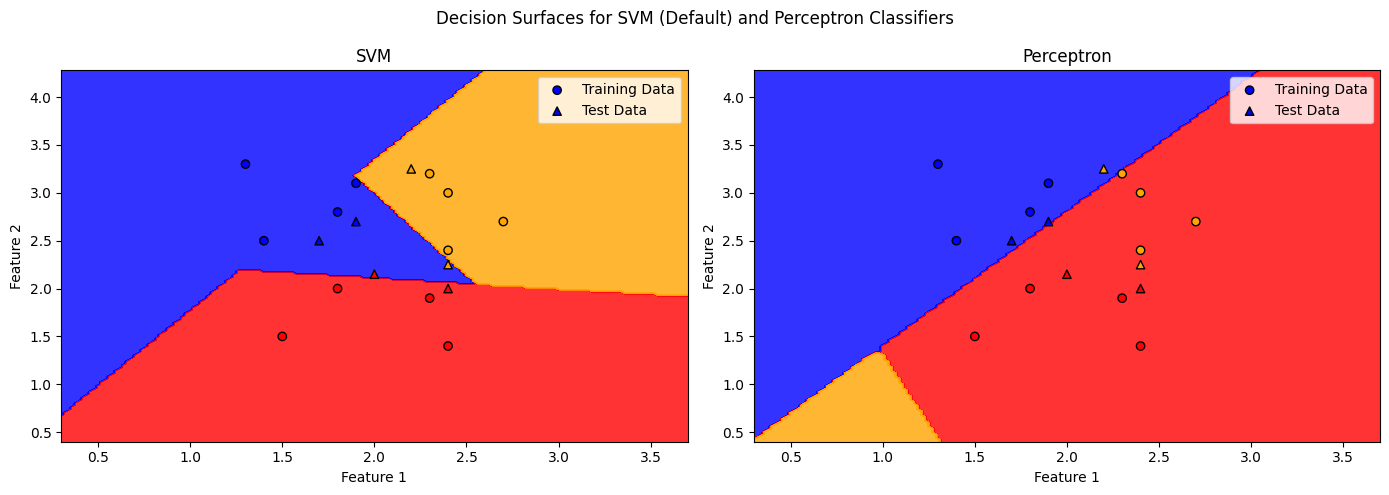

In [ ]:
# Make predictions for each point in the meshgrid
Zs1 = svm_classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Zs2 = svm_classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Zs3 = svm_classifier3.predict(np.c_[xx.ravel(), yy.ravel()])

# combined_perceptron_predictions
combined_svm_predictions_mesh = combine_predictions([Zs1, Zs2, Zs3])
combined_svm_predictions_mesh = combined_svm_predictions_mesh.reshape(xx.shape)


Zp1 = perceptron_classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Zp2 = perceptron_classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Zp3 = perceptron_classifier3.predict(np.c_[xx.ravel(), yy.ravel()])

# combined_perceptron_predictions
combined_perceptron_predictions_mesh = combine_predictions([Zp1, Zp3, Zp2])
combined_perceptron_predictions_mesh = combined_perceptron_predictions_mesh.reshape(xx.shape)

# Set up the subplots for SVM classifiers
fig, axs = plt.subplots(1,2, figsize=(14, 5))

# Plot decision surfaces for Perceptron classifier
axs[1].contourf(xx, yy, combined_perceptron_predictions_mesh, alpha=0.8, cmap=cmap)

# Plot decision surfaces for SVM classifier
axs[0].contourf(xx, yy, combined_svm_predictions_mesh, alpha=0.8, cmap=cmap)

# Scatter plot for training and test data
for i, ax in enumerate(axs.flat):
    ax.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=cmap, edgecolors='k', marker='o', label='Training Data')
    ax.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=cmap, edgecolors='k', marker='^', label='Test Data')
    ax.legend()
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Set titles for each subplot
axs[0].set_title('SVM')
axs[1].set_title('Perceptron')

# Set overall title for the figure
fig.suptitle('Decision Surfaces for SVM (Default) and Perceptron Classifiers')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Analyze performance.

In [ ]:
# Calculate accuracy score
svm_accuracy = accuracy_score(Y_Test, combined_svm_predictions)
print("Combined SVM Accuracy:", svm_accuracy)

# Calculate accuracy score
perceptron_accuracy = accuracy_score(Y_Test, combined_perceptron_predictions)
print("Combined Perceptron Accuracy:", perceptron_accuracy)

Combined SVM Accuracy: 0.6666666666666666
Combined Perceptron Accuracy: 0.6666666666666666


Compare performance with section (a) solution.

In [ ]:
print("Combined SVM Accuracy:", svm_accuracy)
print("Combined Perceptron Accuracy:", perceptron_accuracy)

#section (a) accuracy
predictions = classifier.predict(X_Test)
svm_a_accuracy = accuracy_score(Y_Test, predictions)

print("Section (a)  svm Accuracy:", svm_a_accuracy)


Combined SVM Accuracy: 0.6666666666666666
Combined Perceptron Accuracy: 0.6666666666666666
Section (a)  svm Accuracy: 1.0


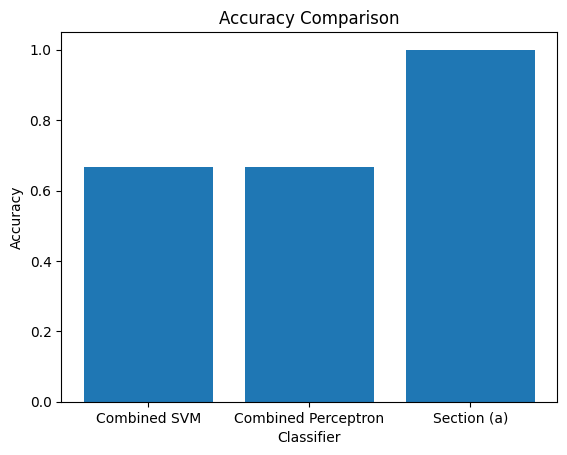

In [ ]:
# Accuracy values
accuracy_values = [svm_accuracy, perceptron_accuracy, svm_a_accuracy]

# Bar plot
classifiers = ['Combined SVM', 'Combined Perceptron', 'Section (a)']
plt.bar(classifiers, accuracy_values)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


The observation


> We found



# (d) conclusion
*  Determine the reason **why SVM** performance in section (a) is **different** than **aggregated** performance of SVM in section (c).
* **Refine**
the default SVM by selecting the **appropriate parameter**.
* **Train** the
SVM model with **selected parameters** and **evaluate** its performance.
Obtain **confusion matrices** and **decision surfaces** for **multi-class classification**. 
* **Compare** results with the **default SVM** and **discuss** the **impact of parameter selection.**


Determine the reason why SVM performance in section (a) is different than aggregated performance of SVM in section (c)?

> Because



Refine the default SVM by selecting the appropriate parameter.

Train the SVM model with selected parameters and evaluate its performance.

In [ ]:
# Create the SVM model with desired parameters
svm_model = svm.SVC(C=0.1, kernel='linear', gamma='scale')

# Train the SVM model
svm_model.fit(X_Train, Y_Train)

# Make predictions on the test set
predictions = svm_model.predict(X_Test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_Test, predictions)

print("Accuracy:", accuracy)

Accuracy: 1.0


Why we select those parameters


> As we made



Obtain confusion matrices for multi-class classification.

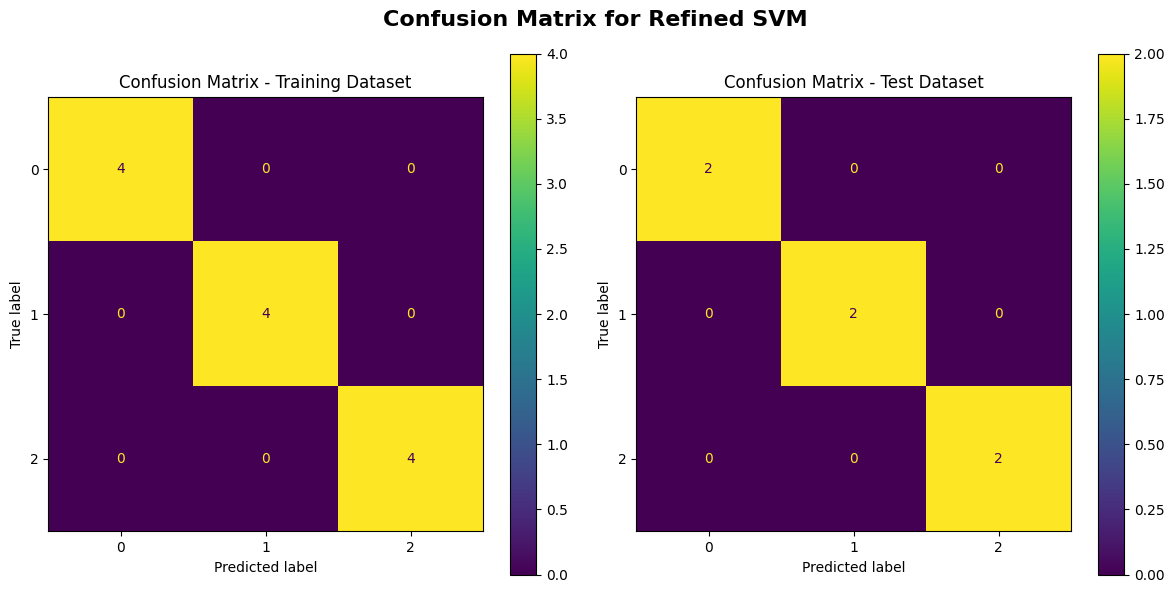

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for the test dataset
test_cm1 = ConfusionMatrixDisplay.from_estimator(classifier, X_Test, Y_Test, ax=axs[1])
test_cm1.ax_.set_title('Confusion Matrix - Test Dataset')

# Plot the confusion matrix for the training dataset
train_cm1 = ConfusionMatrixDisplay.from_estimator(classifier, X_Train, Y_Train, ax=axs[0])
train_cm1.ax_.set_title('Confusion Matrix - Training Dataset')

# Add a suptitle for the entire plot
plt.suptitle('Confusion Matrix for Refined SVM', fontsize=16, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Obtain decision surfaces for multi-class classification.

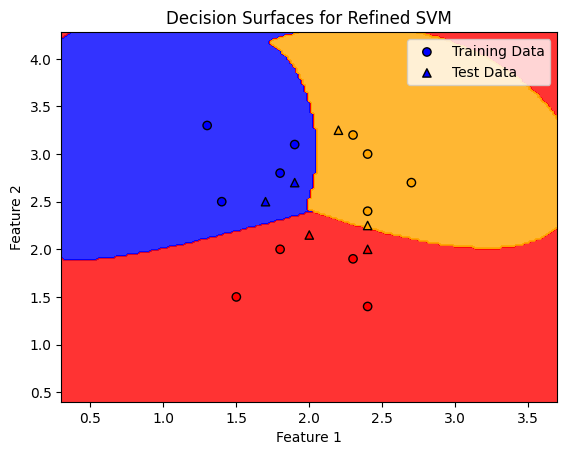

In [ ]:
# Make predictions for each point in the meshgrid
Zr = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Zr = Zr.reshape(xx.shape)

# Plot the decision surfaces
plt.contourf(xx, yy, Zr, alpha=0.8, cmap=cmap)

# Plot training data points make edges black and in circle shape
plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=cmap, edgecolors='k', marker='o', label='Training Data')

# Plot test data points make edges black and in tringle shape
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=cmap, edgecolors='k', marker='^', label='Test Data')

# Add legends and labels
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Surfaces for Refined SVM')

# Show the plot
plt.show()

Compare results with the default SVM and discuss the impact of parameter selection.

As a comparision with section (a)


> We observed



# KNN classifier
Use scikit-learn or other python packages to implement a **KNN classifier** (redKNeighborsClassifier). In this question, we use car-evaluationdataset, which can be downloaded from magentatheir official website or
magentaKaggle

# Data Preprocessing
* In this dataset, there are 1728 samples in total. Firstly, you need
to **shuffle** the dataset and **split** the dataset into a **training** set with **1000** samples and a **validation** set with **300** samples and a **testing** set
with **428** samples.
* Use **python** to implement this data preparation
step. 

In [ ]:
data = pd.read_csv('car.data',header=None)
header = pd.Index(['buying', 'maint', 'doors','persons','lug boot','safety','decision'])
data.columns = header

In [ ]:
shuffled_df = data.sample(frac=1).reset_index(drop=True)

In [ ]:
x = shuffled_df.drop('decision',axis=1)
y=shuffled_df['decision']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=(428/1728),random_state=42)

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=(300/1300),random_state=42)

In [ ]:
x_test.shape

(428, 6)

## Distant Metric
* Since some attributes are represented by **string values.** If we choose
a distance metric like **Euclidean distance**, we need to **transform** the **string** values into **numbers**. 
*  Use **python** to implement this preprocessing step. 

In [ ]:
labeler = LabelEncoder()

In [ ]:
x_train = x_train.apply(labeler.fit_transform)
y_train = labeler.fit_transform(y_train)
x_test = x_test.apply(labeler.fit_transform)
y_test = labeler.fit_transform(y_test)
x_val = x_val.apply(labeler.fit_transform)
y_val = labeler.fit_transform(y_val)

## Training Samples
* Try to use **different** number of training samples to show the impact
of number of training samples. Use 10%, 20%, 30%, 40%, 50%,
60%, 70%, 80%, 90% and 100% of the training set for **10 separate KNN classifiers** and show their **performance** (accuracy score) on the **validation** set and **testing** set. 
*  You can specify a fixed **K=2** value
(nearest neighbor) in this question. 
* Notably, **X axis** is the portion of
the **training** set, **Y axis** should be the **accuracy** score.
* There should
be **two lines** in total, one is for the **validation** set and another is for
the **testing** set. 

In [ ]:
knn_models = ['knn1','knn2','knn3','knn4','knn5','knn6','knn7','knn8','knn9','knn10']
val_accuracy_scores = []
test_accuracy_scores = []
train_portions = []
for i in range(0,len(knn_models)-1):
  knn_models[i] = KNeighborsClassifier(n_neighbors=2)
  X,_,Y,_ = train_test_split(x_train,y_train,train_size =((i+1)/10),random_state=42)
  knn_models[i].fit(X,Y)
  y_pred_val = knn_models[i].predict(x_val)
  y_pred_test = knn_models[i].predict(x_test)
  val_accuracy_scores.append(accuracy_score(y_val,y_pred_val))
  test_accuracy_scores.append(accuracy_score(y_test,y_pred_test))
  train_portions.append(((i + 1) * 10))

In [ ]:
knn_models[9] = KNeighborsClassifier(n_neighbors=2)
knn_models[9].fit(x_train,y_train)
y_pred_val = knn_models[9].predict(x_val)
y_pred_test = knn_models[9].predict(x_test)
val_accuracy_scores.append(accuracy_score(y_val,y_pred_val))
test_accuracy_scores.append(accuracy_score(y_test,y_pred_test))
train_portions.append(100)

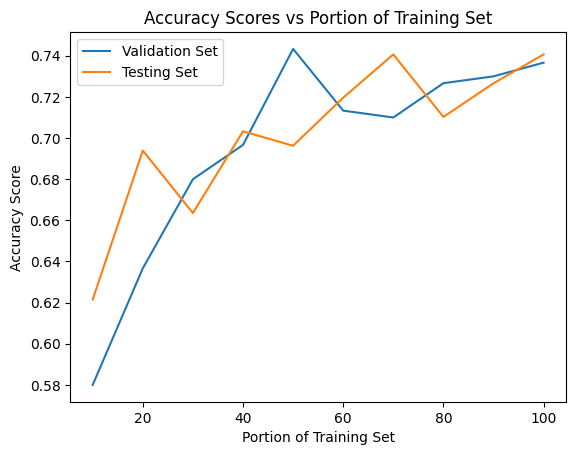

In [ ]:
plt.plot(train_portions, val_accuracy_scores, label='Validation Set')
plt.plot(train_portions, test_accuracy_scores, label='Testing Set')
plt.xlabel('Portion of Training Set')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores vs Portion of Training Set')
plt.legend()
plt.show()

## Best K
* Use 100% of training samples, try to find the **best K value**, and
show the **accuracy curve** on the validation set when K varies from
1 to 10.

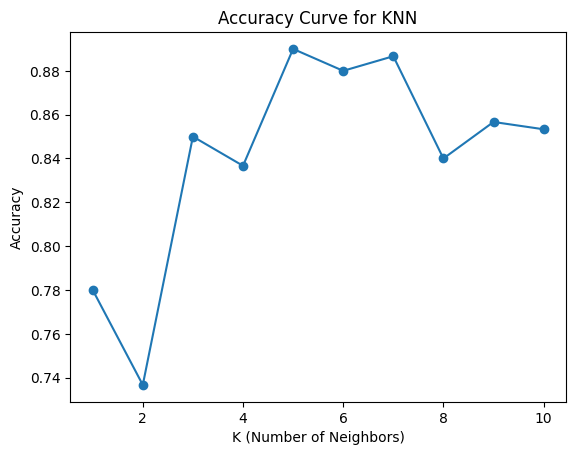

In [ ]:
accuracy_scores = []
k_values = []
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_val)
  accuracy = accuracy_score(y_val, y_pred)
  k_values.append(i)
  accuracy_scores.append(accuracy)

# Plot the accuracy curve
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for KNN')
plt.show()

## Conclusion
*  Provide your conclusions from the experiments of question (c) and
(d) in this question.

### Our Conclusion
* 1- changing the number of k wisely will improve the accuracy of the model
* 2
* 3